# INSTAGRAM BOT

### Importing Libraries

In [241]:
import re
import time
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from getpass import getpass
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.chrome.options import Options

## Part1 : Automation

### Starting Chrome Webdriver

In [15]:
# Chrome Options changed to avoid Allow Notification popup
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


### Visiting Instagram

In [16]:
driver.get('https://www.instagram.com/')
driver.implicitly_wait(10)
driver.maximize_window()

In [17]:
# Wait for Instagram page to Load
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, "username")))
time.sleep(2)

### Login into Instagram

In [18]:
#Login to your Instagram Handle
#Submit with sample username and password
user = 'proton_professor'
waiter=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.NAME,"username")))
username = driver.find_element_by_name('username')
username.send_keys(user)
password = driver.find_element_by_name('password')
password.send_keys(getpass("Enter Password: "))
password.submit()

Enter Password: ········


### Login Info Check

In [21]:
login_alert = driver.find_element_by_class_name('sqdOP')
login_alert.click()

### Enable Search Box

In [22]:
#Type for “food” in search bar and print all the names of the Instagram Handles that are displayed in list after typing “food”
#Note : Make sure to avoid printing hashtags
Search = driver.find_elements_by_tag_name('input')
Search[1].send_keys('food')
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@class="yCE8d  "]/div/div[2]/div/span')))
list_path = driver.find_elements_by_xpath('//a[@class="yCE8d  "]/div/div[2]/div/span')
search_list = []
for i in list_path:
    x = i.get_attribute('innerHTML')
    if(x[0]=='#'):
        continue
    search_list.append(x)
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "coreSpriteSearchClear")))

In [25]:
# Print Search List
# print(search_list)

In [26]:
# Clear Search Bar
Search[1].clear()

### Searching and Opening a Given Profile

In [36]:
Search = driver.find_elements_by_tag_name('input')
Search[1].send_keys('So Delhi')
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@class="yCE8d  "]/div/div[2]/div/span')))
open_profile = driver.find_element_by_class_name('yCE8d')
open_profile.click()

### Following the User

In [52]:
try:
    follow = driver.find_element_by_class_name('BY3EC')
    follow.click()
except NoSuchElementException:
    print("Already Following this User")

Already Following this User


### Unfollowing the User

In [49]:
try:
    unfollow = driver.find_elements_by_class_name('sqdOP')[1]
    unfollow.click()
    unfollow_alert = driver.find_element_by_class_name('aOOlW')
    unfollow_alert.click()
except IndexError:
    print("Already Unfollowed")

Already Unfollowed


### Visiting Another Profile

In [86]:
Search_from_profile = driver.find_elements_by_tag_name('input')
Search_from_profile[1].clear()
Search_from_profile[1].send_keys('dilsefoodie')
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "yCE8d")))
driver.find_element_by_class_name('yCE8d').click()
time.sleep(3)

### Manual Scrolling to Load Elements

In [87]:
driver.execute_script('window.scrollBy(0, 3000);')
time.sleep(2.5)
driver.execute_script('window.scrollBy(0, 3000);')
time.sleep(2.5)
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "Nnq7C")]/div/a/div[1]')))

### Liking Top 30 Posts

In [88]:
post_open = driver.find_elements_by_class_name('_9AhH0')
post_open = post_open[:30]

In [138]:
for i in post_open:
    i.click()
    driver.implicitly_wait(40)
    like_post = driver.find_element_by_xpath('//button[contains(@class,"wpO6b")]/div/span')
    check_like = like_post.get_attribute('innerHTML')
    b = check_like
    y = re.split(r'[<>]',b) 
    if "Unlike" in y[1]:
        print("Already liked")
    else:
        like_post.click()
        print("Liked the Post!")
    post_close = driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]')
    post_close.click()

Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked
Already liked


### Unliking Top 30 Posts

In [139]:
#For Unliking
for i in post_open:
    i.click()
    driver.implicitly_wait(10)
    like_post = driver.find_element_by_xpath('//button[contains(@class,"wpO6b")]/div/span')
    check_like = like_post.get_attribute('innerHTML')
    b = check_like
    y = re.split(r'[<>]',b) 
    if "Unlike" in y[1]:
        print("Unliked the Post!")
        like_post.click()
    else:
        print("Already Unliked")
    post_close = driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]')
    post_close.click()

Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!
Unliked the Post!


### Extracting List of Followers of a Particular ID

In [142]:
# Visit the Profile
Search_from_profile = driver.find_elements_by_tag_name('input')
Search_from_profile[1].clear()
Search_from_profile[1].send_keys('So Delhi')
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "yCE8d")))
driver.find_element_by_class_name('yCE8d').click()
time.sleep(3)

#### Open Followers List

In [227]:
follower_list_open = driver.find_elements_by_class_name('-nal3')
# follower_list_open[1].get_attribute('outerHTML')
follower_list_open[1].click()

In [228]:
while True:
    try:
        followers = []
        count = 0
        while True:
            elements = driver.find_elements_by_xpath('//a[contains(@class,"notranslate")]')
            if len(elements)<500:
                waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//ul[contains(@class,"jSC57")]')))
                driver.execute_script('arguments[0].scrollIntoView(0,100)',driver.find_element_by_xpath('//ul[contains(@class,"jSC57")]'))
                time.sleep(1)
            i = elements[count].get_attribute('innerHTML')
            url = "https://www.instagram.com/" + i + "/"
            followers.append(url)
            if len(followers)>=500:
                break
            count = count + 1
        break
    except StaleElementReferenceException:
        continue

In [240]:
# List of All Followers
for i in followers:
    print(i)

https://www.instagram.com/ruths_mohite/
https://www.instagram.com/proton_professor/
https://www.instagram.com/the.yummy.bite/
https://www.instagram.com/arushi._.99/
https://www.instagram.com/the_delhi_raabta/
https://www.instagram.com/meme.r0867/
https://www.instagram.com/rocky1ucseller/
https://www.instagram.com/gypsy__soul__/
https://www.instagram.com/lagombypalak/
https://www.instagram.com/chiranjeevi_69/
https://www.instagram.com/nikhil_baisla_018/
https://www.instagram.com/suraj.kaushik4528/
https://www.instagram.com/das__deepika/
https://www.instagram.com/vinit.kush/
https://www.instagram.com/epicure_from_heart/
https://www.instagram.com/ksshhv.v/
https://www.instagram.com/haris00786/
https://www.instagram.com/ruki.me/
https://www.instagram.com/doggysundays/
https://www.instagram.com/iam_ankurgupta/
https://www.instagram.com/iamkunal1112/
https://www.instagram.com/mrsfoodiehot/
https://www.instagram.com/bakelane9/
https://www.instagram.com/its_starb0y/
https://www.instagram.com/b

### Checking the Story of a Profile

In [235]:
# Visit the Profile
Search_from_profile = driver.find_elements_by_tag_name('input')
Search_from_profile[1].clear()
Search_from_profile[1].send_keys('dilsefoodie')
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "yCE8d")))
driver.find_element_by_class_name('yCE8d').click()
time.sleep(3)

In [231]:
story = driver.find_element_by_class_name('_6q-tv')

In [232]:
story.click()

In [239]:
try:
    story = driver.find_element_by_xpath('//div[contains(@class,"h5uC0")]')
    story_seen = driver.find_element_by_class_name('CfWVH').get_attribute('height')
    if story_seen == '208':
        print('Story already Seen!')
    else:
        story.click()
        print("Story Seen")
except NoSuchElementException:
    print("No Story!!")

Story Seen


## Part 2 : Web Scrapping

In [242]:
driver.get('https://www.instagram.com/')

### Scraping Top 10 Trending Usernames for a Specific Key

In [259]:
# Typing the Name and waiting for list of Usernames
Search_from_profile = driver.find_elements_by_tag_name('input')
Search_from_profile[1].clear()
Search_from_profile[1].send_keys('food')
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "yCE8d")))

In [260]:
count = 0
trending_users = []
l = driver.find_elements_by_xpath('//span[@class="Ap253"]')
for i in l:
    user_n = i.get_attribute('innerHTML')
    if user_n[0]!='#' and count<10:
        trending_users.append(user_n)
        count = count + 1

In [263]:
print(trending_users)

['foodiesince96', 'foodnetwork', 'foodgod', 'mouthwatering.dishes', 'ndtv_food', 'foodelhi', 'food', 'thisisdelhi', 'gajabfood', 'foodtalkindia']


In [262]:
# Switch Focus from Search Bar to Main Page
driver.find_element_by_xpath('//div[contains(@class, "coreSpriteSearchClear")]').click()

### Getting 5 Users with most Followers among 10

In [300]:
followers_of_trending_users_count = []
for user in trending_users:
    Search_from_profile = driver.find_elements_by_tag_name('input')
    Search_from_profile[1].clear()
    Search_from_profile[1].send_keys(user)
    waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "yCE8d")))
    driver.find_element_by_class_name('yCE8d').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@class="-nal3 "]/span[@class="g47SY "]')))
    number_of_followers = driver.find_elements_by_class_name('g47SY')[1].get_attribute('title')
    number_of_followers = int(number_of_followers.replace(',',''))
    followers_of_trending_users_count.append(number_of_followers)
    time.sleep(3)

In [303]:
print(trending_users)
print(followers_of_trending_users_count)

['foodiesince96', 'foodnetwork', 'foodgod', 'mouthwatering.dishes', 'ndtv_food', 'foodelhi', 'food', 'thisisdelhi', 'gajabfood', 'foodtalkindia']
[252885, 10344342, 3583578, 18235, 59691, 105879, 252885, 163783, 154066, 298610]


In [304]:
trending_users = np.array(trending_users)
followers_of_trending_users_count = np.array(followers_of_trending_users_count,dtype='int')
trending_users=trending_users[np.argsort(followers_of_trending_users_count)][::-1]
followers_of_trending_users_count=followers_of_trending_users_count[np.argsort(followers_of_trending_users_count)][::-1]

In [319]:
new_trending_5 = []
for i in range(5):
    new_trending_5.append(trending_users[i])
new_trending_5[3] = "thisisdelhi"
print(new_trending_5)

['foodnetwork', 'foodgod', 'foodtalkindia', 'thisisdelhi', 'foodiesince96']


### Number of Posts in Past 3 Days by a User

In [320]:
number_of_posts = []
for user in new_trending_5:
    print(user,end=" ")
    Search_from_profile = driver.find_elements_by_tag_name('input')
    Search_from_profile[1].clear()
    Search_from_profile[1].send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "yCE8d")))
    driver.find_element_by_class_name('yCE8d').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count = 0
    # Going to Each Image
    for image in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        image.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))
        time_string=driver.find_element_by_xpath('//time[contains(@class, "Nzb55")]').get_attribute('innerHTML')
        if time_string[-1] in ['h','s']:    # We get Format 6w or 2h or 3d 
            count = count + 1
        elif time_string[-1]=='d' and int(time_string[:-1])<=3:
            count = count + 1
        else:
            post_close = driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]')
            post_close.click()
            break
        post_close = driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]')
        post_close.click()
        time.sleep(2)
    print(" has done " ,count, " Posts in Past 3 Days...!!")
    number_of_posts.append(count)
    time.sleep(1.5)

foodnetwork  has done  33  Posts in Past 3 Days...!!
foodgod  has done  1  Posts in Past 3 Days...!!
foodtalkindia  has done  5  Posts in Past 3 Days...!!
thisisdelhi  has done  5  Posts in Past 3 Days...!!
foodiesince96  has done  11  Posts in Past 3 Days...!!


### Plotting Graphs

<Figure size 432x288 with 0 Axes>

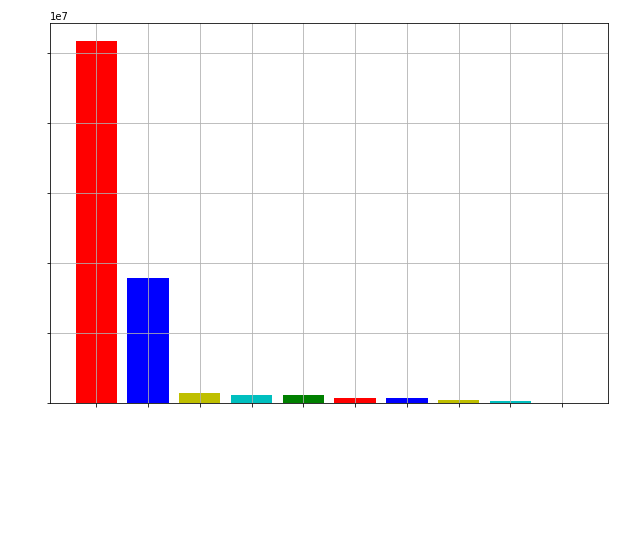

In [331]:
# Plotting a Graph between Top 10 Trending Users and their Follower Counts
plt.subplots(0, 0)
plt.figure(figsize=(10, 7))
plt.bar(trending_users, followers_of_trending_users_count, color='rbycg')
plt.xticks(rotation=45, size=12,color="white")
plt.yticks(size=12,color="white")
plt.title('Users versus numberof followers', size=12,color="white")
plt.xlabel('Users-->', size=12,color="white")
plt.ylabel('Followers-->', size=12,color="white")
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

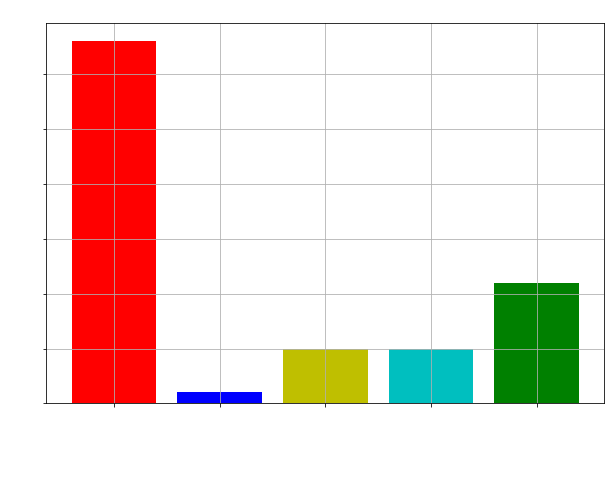

In [332]:
#Graph Between Top 5 among those and Their Instagram Activity
plt.subplots(0, 1)
plt.figure(figsize=(10, 7))
plt.bar(new_trending_5, number_of_posts, color='rbycg')
plt.xticks(rotation=45, size=12,color="white")
plt.yticks(size=12,color="white")
plt.title('Users versus number of posts', size=12,color="white")
plt.xlabel('Users-->', size=12, color="white")
plt.ylabel('Posts--->', size=12, color="white")
plt.grid()
plt.show()

### Scrap Content of First 10 Posts of Each User

In [333]:
driver.get('https://www.instagram.com/')

In [338]:
Captions = []
Hashtags = []
for user in new_trending_5:
    time.sleep(3)
    Search_from_profile = driver.find_elements_by_tag_name('input')
    Search_from_profile[1].clear()
    Search_from_profile[1].send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "yCE8d")))
    driver.find_element_by_class_name('yCE8d').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count = 0
    for image in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        image.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))
        Captions.append(driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span').get_attribute('textContent'))
        for Hash in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span/a'):
            Hashtags.append(Hash.get_attribute('innerHTML'))
        count = count + 1
        if count>=10:
            post_close = driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]')
            post_close.click()
            break
        post_close = driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]')
        post_close.click()
        time.sleep(1)

In [339]:
#this is the scrapped content of all posts
for caption in Captions:
    print(caption)
    print("-------------------------------------------------------------------------------------------------------------")

Happy Birthday, @altonbrown 🎉We hope you're celebrating with a BIG batch of your famous baby back ribs 😋Save the recipe for Who Loves Ya Baby Back Ribs on your @FoodNetworkKitchen app!
-------------------------------------------------------------------------------------------------------------
Class of the Day: Geometric Fruit Tart 🥭 This beautiful no-bake fruit tart will make you look like a professional pastry chef!⁠. . .⁠Click the link in our bio to learn how to artfully slice mango, kiwi and more with @BakedbyDan's class on the @FoodNetworkKitchen app.
-------------------------------------------------------------------------------------------------------------
Break out the fennel! CONGRATS to @AmySchumer and chef Chris for their #Emmys nomination for Outstanding Unstructured Reality Program. #AmySchumerLearnsToCook
-------------------------------------------------------------------------------------------------------------
Get your grill ready! 🔥Tomorrow, @jettila will be making G

In [341]:
# Removing all the users from Hashtags
hashtags = []
for i in Hashtags:
    if(i[0]!='@'):
        hashtags.append(i)
Hashtags = hashtags

### Mapping Frequency of Hashtags

In [344]:
Hashtag_Dictionary = {}
for i in Hashtags:
    if i in Hashtag_Dictionary.keys():
        Hashtag_Dictionary[i] += 1
    else:
        Hashtag_Dictionary[i] = 1

In [346]:
print(Hashtag_Dictionary)

{'#foreverfavorite': 1, '#Emmys': 1, '#AmySchumerLearnsToCook': 1, '#RestaurantImpossible': 1, 'projectcat.discovery.com': 1, '#NoshMatespartner': 1, '#Costco': 1, '#lookdodia': 4, '#supreme': 2, '#f4follow': 2, '#followme': 2, '#giveaway': 2, '#quarentena': 2, '#followforfollowback': 2, '#dankmemes': 2, '#hairstyle': 2, '#natureza': 2, '#challenge': 2, '#xadrez': 2, '#quote': 2, '#44goiania': 2, '#CelebritySlotsPartner': 1, '#CelebritySlots': 1, '#🎰📲': 1, '#NewInTown': 1, '#TalkDrink': 1, '#thisisdelhi': 10, '#foodforlife': 20, '#macaroni': 1, '#sweets': 4, '#tasty': 10, '#yummyintummy': 10, '#video': 10, '#foodphotography': 10, '#likeforlike': 10, '#streetfood': 13, '#snacks': 10, '#yum': 10, '#spicy': 11, '#satisfying': 10, '#satisfyingvideos': 10, '#mumbaifoodblogger': 10, '#grub': 10, '#mumbai': 10, '#delhifoodblogger': 10, '#f52grams': 10, '#delhincr': 10, '#breakfast': 10, '#homemade': 11, '#dessert': 7, '#india': 10, '#indian': 11, '#indianfood': 11, '#potato': 1, '#potatotwist

### Storing the Data in a CSV File

In [355]:
df = pd.DataFrame()
Hashwords = np.array([i for i in Hashtag_Dictionary.keys()])
Frequency = np.array([i for i in Hashtag_Dictionary.values()])
df['Words'] = Hashwords
df['Frequency'] = Frequency
df.to_csv("Hashtag_Frequency_Count.csv")

### List of Trending Hashtags

In [359]:
Hashwords = Hashwords[np.argsort(Frequency)][::-1]
Frequency = Frequency[np.argsort(Frequency)][::-1]
for i in range(len(Hashwords)):
    print(Hashwords[i]," : ",Frequency[i])

#foodforlife  :  20
#streetfood  :  13
#indianfood  :  11
#indian  :  11
#homemade  :  11
#spicy  :  11
#f52grams  :  10
#mumbaifood  :  10
#delhifoodblogger  :  10
#video  :  10
#mumbaifoodblogger  :  10
#satisfyingvideos  :  10
#india  :  10
#breakfast  :  10
#ilovefood  :  10
#delhincr  :  10
#mumbaifoodie  :  10
#delhi_igers  :  10
#satisfying  :  10
#yum  :  10
#snacks  :  10
#likeforlike  :  10
#foodphotography  :  10
#tasty  :  10
#mumbai  :  10
#instafood  :  10
#foodoftheday  :  10
#buzzfeast  :  10
#foodgasm  :  10
#foodstagram  :  10
#foodiesince96  :  10
#thisisdelhi  :  10
#Foodtalkindia  :  10
#delhigram  :  10
#delicious  :  10
#feedfeed  :  10
#yummyintummy  :  10
#grub  :  10
#delhifoodie  :  10
#foodblogger  :  10
#eeeeeats  :  10
#hungry  :  10
#nomnom  :  10
#recipe  :  9
#dessert  :  7
#lookdodia  :  4
#sweets  :  4
#meetha  :  3
#chocolate  :  3
#indiansweets  :  3
#hairstyle  :  2
#xadrez  :  2
#gurgaon  :  2
#waffle  :  2
#wafflelover  :  2
#sweet  :  2
#wafflel

### Plotting a Pie Chart

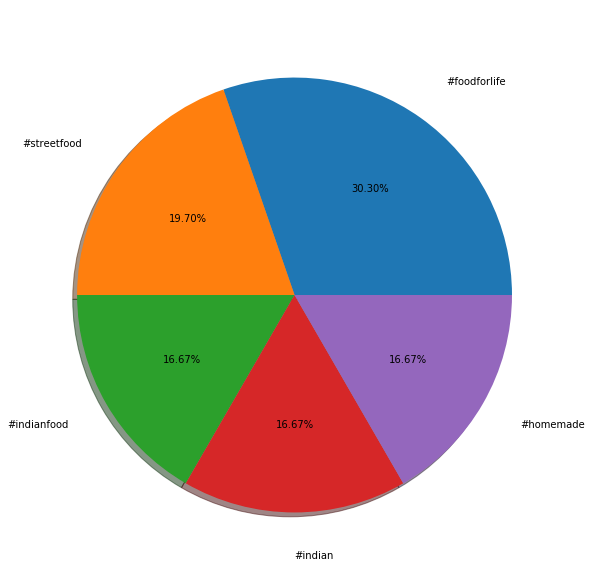

In [363]:
x=Hashwords[:5]
y=Frequency[:5]
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, autopct='%.2f%%', shadow=True, labeldistance=1.2)
plt.title('Pie Chart of Most Trending Hashtags',color="white")
plt.show()